<h1>KNN Algorithm</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

# K-Nearest Neighbors

<b><i>Definition:</b></i> 
- K-Nearest Neighbors(KNN) is a supervised machine learning methods to tackle the problems related to classification
and regression problems
- It is a widely used in real life since it has no non-parametric.
- It does not require assumption about the underlying data distribution

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200616145419/Untitled2781.png" alt="">

<b><i>Intuition behind KNN</b></i>:
- We have a set of data points as a training data
- After plotting them, we can have some groups or clusters
- Input an unclassified point, we can assign it to a group by observing what group its nearest neighbors belong to.

<b><i>How KNN work</b></i>

- Add a unclassified point
- Finding K nearest neighbors based on a distance metric such as Euclidean distance
- Then, the class or the value of data point is then detemined by the majority vote or average of the K neighbors

<b>I. Find Distance</b>

1. <b><i>Euclidean Distance</b></i>
<img src="euclidean.png" alt="">

In [2]:
def euclideanDistance(x, X):
    return np.sqrt(np.sum([np.pow(x[i] - X[i], 2) for i in range(len(x))]))

2. <b><i>Manhattan Distance</b></i>
<img src="manhattan.png" alt="">

In [3]:
def manhattanDistance(x, X):
    return np.sum([np.abs(x[i] - X[i]) for i in range(len(x))])

3. <b><i>Minkowski Distance</b></i>
<img src="minkowski.png" alt="">
  - Minkowski distance is a general and the most common while dealing with Machine Learning( p = 2 : Euclidean, p = 1: Manhattan)
  - Some other distance metrics is as well like <u>Hamming Distance</u> dealed with overlapping comparision between two vectors whose contents can be Boolean as well as string values.

In [4]:
def minkowskiDistance(x, X, p):
    return np.around(np.pow(np.sum([np.pow(x[i] - X[i], p) for i in range(len(x))]) , 1/p), 2)

In [5]:
def customDistance(x, X, options=0):
    '''
    default: manhattan distance
    0: manhattan distance
    1: euclidean distance
    n: minkowski distance
    '''
    if options == 0:
        return manhattanDistance(x, X)
    elif options == 1:
        return euclideanDistance(x, X) 
    elif options.isdigit():
        return minkowskiDistance(x, X, options)
    return 0

II. <i><b>How to choose the value of k for KNN</b></i>
- Choosing the optimal k is crucial to define the number of neighbors, if the input data has more outliers or noise, a higher value of k would be better.
- Here the few steps for selecting optimal value of n neighbors in KNN:
    - <b>Define a Range</b>: Set a range for k, like 1 to 20.
    - <b>Data Split</b>: Segment your dataset into training and testing sets to gauge model generalization.
    - <b>Choose Metric</b>: Opt for a performance metric (e.g., accuracy, precision, recall) aligned with your goal.
    - <b>Cross-Validation Setup</b>: Employ cross-validation, like <b>k-fold</b>, to robustly evaluate each k value.
    - <b>Grid Search</b>: Execute a grid search, testing k across the defined range.
    - <b>Evaluate Performance</b>: Compute performance metrics for each k through cross-validation, aiding the identification of the optimal value.
    - <b>Visualize Findings</b>: Craft visualizations (line plots, bar charts) to depict the correlation between k and the chosen performance metric.
    - <b>Fine-Tune if Needed</b>: If initial results hint at a promising range, narrow it down for finer optimization.
    - <b>Select Optimal k</b>: Choose the k value balancing accuracy and simplicity, informed by evaluation and visualization.
    - <b>Test on New Data</b>: Validate the chosen k value on a test set to ensure efficacy in predicting new, unseen data.

<i><b>K Fold Cross Validation</b></i>
- Def: Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data
- Used for: The main purpose of cross validation is to prevent overfitting, which occurs when a model is trained too well on the training data and performs poorly on new, unseen data. By evaluating the model on multiple validation sets, cross validation provides a more realistic estimate of the model’s generalization performance, i.e., its ability to perform well on new, unseen data.
- Intuition:
  - Spliting the dataset into k number of subsets(folds) - * NOTE: k = 5 or k = 10 to avoid overfitting or be the same as LOOCV method.
  - Training all subsets and leave one(k - 1) for testing data.
  - Iterate above step k times

In [6]:
def myweight(distances):
    sigma2 = .5 # we can change this number
    return np.exp(-distances**2/sigma2)

<h4>KNN Algorithm - code function</h4>

In [7]:
def knn_predict(X_train, y_train, X_test, k, option=0):
    predictions = []
    for test_point in X_test: # consider each test data point
        distances = [] # create distance array to memorize the distance from train points to test point
        for index, train_point in enumerate(X_train): # consider each train point
            distance = customDistance(train_point, test_point, option)
            distances.append([index, distance]) # calc the Euclidean distance between train point and test point
        distances = sorted(distances, key=lambda x:x[1]) # sorted the distances

                                                                         # d[index, euclideanDistance] in X_train -> d[0] : index of X_train
        label_nearest_neighbors = [y_train[d[0]] for d in distances[:k]] # => y_train[d[0]] is the label of train data point
        labels, counts = np.unique(label_nearest_neighbors, return_counts=True) # take unique label with the count
        
        max_count = np.max(counts)
        max_labels = [labels[i] for i, count in enumerate(counts) if count == max_count]
        
        if len(max_labels) > 1:
            # random choice between labels having the same frequency
            predictions.append(np.random.choice(max_labels))
        else:
            predictions.append(max_labels[0])

    # visualize the KNN
    
    return predictions

<h4>K fold cross validation - code function</h4>

In [8]:
def k_fold_cross_validation(X, y, k_folds, k_neighbors, option=0):
    '''
    Use training data to evaluate k_neighbors
    Steps:
    1. Taking the fold size 
    2. Using for loops to iterate each fold as testing data and the remaining folds is for training data
    3. After split data, use X_train, y_train, X_test for knn_predict (built above) to take predictions
    4. Comparing predictions to y_test to take the accuracy and add to an array
    (*Note: I choose accuracy metric to evaluate model, we can use the others like precision or recall metric)
    5. When completing the loop, the mean of array is the estimator performance
    '''
    fold_size = len(X) // k_folds
    accuracies = []
    for i in range(k_folds):
        X_train = np.concatenate((X[: i * fold_size], X[(i + 1) * fold_size:]))
        y_train = np.concatenate((y[: i * fold_size], y[(i + 1) * fold_size:]))
        X_test = X[i * fold_size: (i + 1) * fold_size]
        y_test = y[i * fold_size: (i + 1) * fold_size]
        predictions = knn_predict(X_train, y_train, X_test, k_neighbors, option)
        numberOfTruePredictions = np.sum([1 if predictions[j] == y_test[j] else 0 for j in range(fold_size)])
        accuracies.append(numberOfTruePredictions / len(predictions))
    return np.mean(accuracies)

<h4>Finding the optimal k - code function</h4>

In [9]:
def find_optimal_k(X, y, k_folds, option=0):
    '''
    Finding optimal k based on k_fold_cross_validation to evaluate each k_neighbor which is the most efficiency
    Steps:
    1. Taking a list range of predictable list of k values (ex: range(1,20))
    2. Computing the rate of each k by k_fold_cross_validation function built above, after that adding to an array
    3. Find the max value as the optimal k of this array
    * Note: If not sastified with the result, we can change the range to fit the model (use line plot to monitor the value)
    '''
    k_neighbors_list = list(range(1,50))
    k_neighbors_list.reverse()
    accuracies = []
    for k_neighbors in k_neighbors_list:
        accuracies.append((k_neighbors, k_fold_cross_validation(X, y, k_folds, k_neighbors, option)))
    # Use this code to visualize the efficiency of k_neighbors
    accuracies = np.array(accuracies)
    plt.plot(accuracies[:, 0], accuracies[:, 1])
    plt.show()
    optimal_k = max(accuracies, key=lambda x:x[1])
    print("max_accuracy: {} <br>optimal_k: {} ".format(optimal_k[1], optimal_k[0]))
    return int(optimal_k[0])

<h4>Apply above functions to train data</h4>

Number of classes: 3
Number of data points: 150


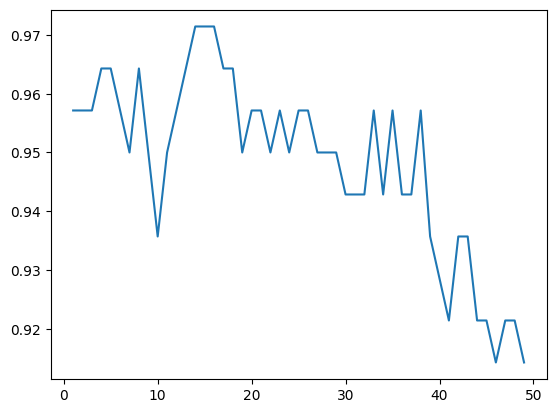

max_accuracy: 0.9714285714285715 <br>optimal_k: 16.0 
Accuracy: 100.0%


In [10]:
def main():
    # x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12] # coordinate x
    # y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21] # coordinate y

    # # process the pre-dataset
    # X_train = []
    # for i in range(len(x)):
    #     X_train.append([x[i], y[i]])
    # X_train = np.array(X_train)
    # y_train = np.array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1]) # labels for X_train
    # X_test = np.array([[8,21],[7,18],[9,22], [4,16],[9,21]]) # test data set
    
    iris = datasets.load_iris()
    iris_X = iris.data
    iris_y = iris.target
    print('Number of classes: %d' %len(np.unique(iris_y)))
    print('Number of data points: %d' %len(iris_y))

    
    X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=10)

    # find optimal k
    k_folds = 5
    options = 1 # find optimal distance
    k = find_optimal_k(X_train, y_train, k_folds, options)
    # use this k for model
    predictions = knn_predict(X_train, y_train, X_test, k, options)
    
    accuracy = sum(1 for i in range(len(predictions)) if predictions[i] == y_test[i]) / len(predictions) * 100
    print(f'Accuracy: {accuracy}%')
    
    # # plot the graph
    # plt.scatter(x, y, c=y_train) # data from training data
    # plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='x') # data from prediction data
    # for index, test_point in enumerate(X_test):
    #     plt.text(x=test_point[0]-0.2, y=test_point[1]-0.5, 
    #          s=f"p{index}")
    # plt.show()
main()

Accuracy Manhattan: 96%
Accuracy Euclidean: 98%

<h3>Data Preprocession</h3>

1. <h4>Split data</h4>

In [11]:
def train_test_split(X, y, test_size, random_state=None):
    if test_size < 0 or test_size > 1:
        raise ValueError("test_size is invalid")
    if random_state != None:
        np.random.seed(int(random_state))
        
    X = np.array(X)
    y = np.array(y)

    n_samples = len(y)
    test_size = int(n_samples*test_size)
    train_size = n_samples - test_size

    indices = np.random.permutation(n_samples) # hoan vi ngau nhien
    
    test_indices = indices[:test_size] 
    train_indices = indices[test_size:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

<h4>Standard Scaler - Data Preprocession</h4>

In [12]:
class StandardScaler():
    def __init__(self):
        self.means = None
        self.stds = None
    def fit(self,X):
        self.means = np.mean(X, axis=0)
        self.stds = np.std(X, axis=0)
    def transform(self,X):
        if (self.means).all() == None or (self.stds).all() == None:
            raise Exception("Scaler has not been fitted yet")
        X_scaled = (X - self.means) / self.stds
        return X_scaled

<h4>KNN in real dataset</h4>

<h5>import necessary lib</h5>

In [13]:
import numpy as np
import pandas as pd

<h5>preprocessing data</h5>

In [14]:
# read file csv
data = pd.read_csv("teleCust1000t.csv", encoding='latin-1')
print(data.head())
data.dtypes

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [15]:
# extract data
# X = data.drop(['retire', 'martial'], axis=1).loc[:99]
# X = pd.get_dummies(X)
# y = data.iloc[:100, -1]
# X.shape, y.shape

X = data.drop(['custcat'], axis=1)
y = data.iloc[:, -1]
X.shape, y.shape
# plt.scatter(X.iloc[:, 0],X.iloc[:, 1], c=y)
# plt.show()

((1000, 11), (1000,))

In [16]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.3, 42)


# standardalize data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

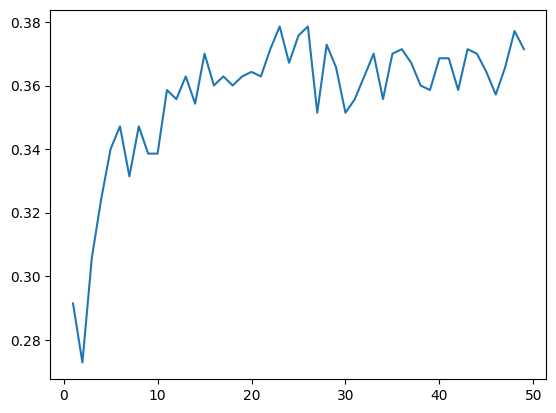

max_accuracy: 0.37857142857142856 <br>optimal_k: 26.0 


In [18]:
# # find optimal k
k_folds = 10
k = find_optimal_k(X_train_scaled, y_train, k_folds)